In [2]:
import numpy as np 
import matplotlib.pyplot as plt

## loss experiment


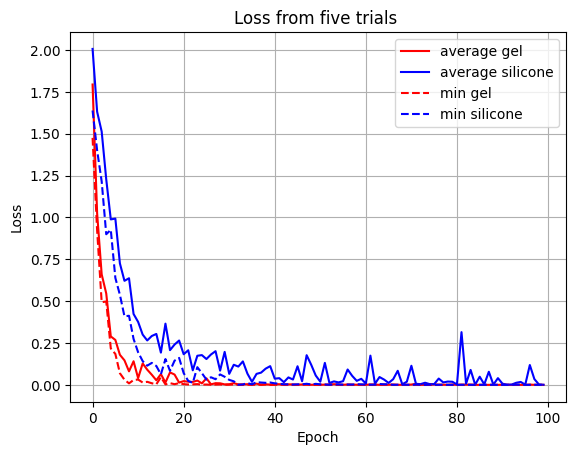

In [10]:
asil=np.load("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/saves/accuracies_of_sil.npy")
sil_loss=np.load("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/saves/loss_of_sil.npy")
agel=np.load("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/saves/accuracies_of_gel.npy")
gel_loss=np.load("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/saves/loss_of_gel.npy")

averaged_gel=np.average(gel_loss,axis=0)
averaged_sil=np.average(sil_loss,axis=0)
min_gel=np.min(gel_loss,axis=0)
min_sil=np.min(sil_loss,axis=0)

plt.plot(averaged_gel,c="r",label="average gel")
plt.plot(averaged_sil,c="b",label="average silicone")
plt.plot(min_gel,"--",c="r",label="min gel")
plt.plot(min_sil,"--",c="b",label="min silicone")

plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Loss from five trials ")
plt.grid()
plt.savefig("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/images/lossGelvsSil.pdf")
plt.show()

## Resolution

In [ ]:
x=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9,1]
train_scores=np.load("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/saves/resolutions_train.npy")
test_scores=np.load("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/saves/resolutions_test.npy")

plt.plot(x,np.average(train_scores,axis=2)*100,c="b",label="Average train")
plt.plot(x,np.average(test_scores,axis=2)*100,c="r",label="Average test")
plt.plot(x,np.max(train_scores,axis=2)*100,"--",c="b",label="Max train")
plt.plot(x,np.max(test_scores,axis=2)*100,"--",c="r",label="Max test")
plt.ylabel("Accuracy (%)")
plt.xlabel("Resolution")
plt.title("Accuracy vs resolution ")
plt.grid()
plt.savefig("C:/Users/dexte/Documents/GitHub/RoboSkin/Code/NewRigExperiments/images/ResolutionVsAccuracy.pdf")
plt.show()